## NLP Sentiment classification

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pckl

In [27]:
database = pckl.load(open('data_query.p', 'rb'))

## Exploration

In [35]:
database.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence,q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence,orig_golden,internal_id,orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold,orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,target,tweet,tweet_id
0,713632888,True,golden,30,None,AGAINST: We can infer from the tweet that the ...,0.6581,2. The tweet does NOT expresses opinion about ...,0.4976,True,189,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,Thank you for another day of life Lord. #Chris...,id588718177095266305
1,713632889,False,golden,2,None,NONE OF THE ABOVE: There is no clue in the twe...,1.0000,2. The tweet does NOT expresses opinion about ...,0.5294,True,190,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@rosaryrevival Lovely to use Glorious Mysterie...,id592798858725425152
2,713632890,True,golden,26,None,AGAINST: We can infer from the tweet that the ...,0.8859,1. The tweet explicitly expresses opinion abo...,0.8820,True,207,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@Niall250 good thing is that #DUP have consist...,id593472619208380419
3,713632891,False,golden,3,None,AGAINST: We can infer from the tweet that the ...,0.6323,1. The tweet explicitly expresses opinion abo...,0.6323,True,211,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,"So, you tell me... is murder okay if the victi...",id592699132399194112
4,713632892,True,golden,31,None,AGAINST: We can infer from the tweet that the ...,0.8920,1. The tweet explicitly expresses opinion abo...,0.8939,True,213,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@HillaryClinton Don't you mean to say (all chi...,id588527665365188608


In [29]:
database.shape

(1159, 17)

In [86]:
database.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unit_id,1159,NaN,NaN,NaN,7.13633e+08,335.487,7.13633e+08,7.13633e+08,7.13633e+08,7.13634e+08,7.13634e+08
golden,1159,2,False,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_state,1159,2,finalized,1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trusted_judgments,1159,NaN,NaN,NaN,8.96635,4.79184,2,8,8,8,38
last_judgment_at,1090,152,2015-05-04T18:36:00,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,1159,4,AGAINST: We can infer from the tweet that the ...,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence,1159,NaN,NaN,NaN,0.78027,0.195433,0.2575,0.6225,0.8143,1,1
q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,1159,3,1. The tweet explicitly expresses opinion abo...,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence,1159,NaN,NaN,NaN,0.721863,0.195343,0.3732,0.51715,0.7407,0.88275,1
orig_golden,69,1,True,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
database.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence',
       'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet',
       'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence',
       'orig_golden', 'internal_id',
       'orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold',
       'orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_twe

In [42]:
#Targets
print(database['target'].unique())

['Legalization of Abortion' 'Hillary Clinton' 'Feminist Movement'
 'Atheism']


In [43]:
#Answers to Q1
print(database['q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target'].unique())
print(database['q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence'].describe())

['AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).'
 'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).'
 'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).'
 'NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this option. One reason for choosing this option is that the tweeter supports the target entity to some extent, but is also against it to some extent.)']
count    1159.000

In [ ]:
database.groupby(by='q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target').plot.bar(y='unit_id')
plt.show()

In [41]:
#Answers to Q2
print(database['q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet'].unique())
print(database['q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence'].describe())

['2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.'
 '1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.'
 '3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)']
count    1159.000000
mean        0.721863
std         0.195343
min         0.373200
25%         0.517150
50%         0.740700
75%         0.882750
max         1.000000
Name: q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence, dtype: float64


In [77]:
print(database['orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target'].unique())

[None]


In [81]:
database.isna().sum()

unit_id                                                                                                                                                       0
golden                                                                                                                                                        0
unit_state                                                                                                                                                    0
trusted_judgments                                                                                                                                             0
last_judgment_at                                                                                                                                             69
q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target                  0
q1_from_reading_the_tweet_which_of_the_o

In [89]:
database['orig_golden'].unique()

array([True, None], dtype=object)

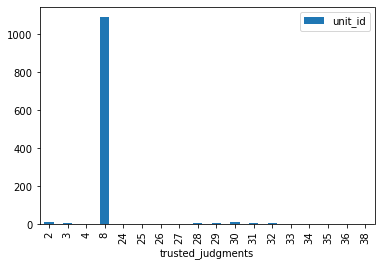

In [64]:
database[['unit_id', 'trusted_judgments']].groupby(by='trusted_judgments').count().plot.bar(y='unit_id')
plt.show()

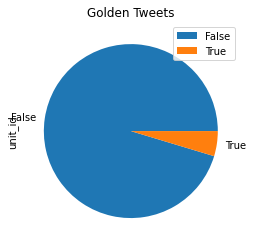

In [72]:
database.groupby(by='golden').count().plot.pie(y='unit_id', label='unit_id')
plt.title('Golden Tweets')
plt.show()